#1. Import library and file

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
import openpyxl


#2. Overview the dataset

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
data = pd.read_excel('/content/drive/My Drive/Machine Learning/CLO-2/water_treatment.xlsx', index_col=0)
data.head()

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
Date,,,,,,,,,,,,,,,,,,,,,
1990-01-01,41230.0,0.35,7.6,120.0,344.0,136.0,54.4,4.5,993,7.5,...,903.0,NaN,62.8,93.3,NaN,62.5,86.7,71.8,87.5,99.4
1990-01-02,37386.0,1.40,7.9,165.0,470.0,170.0,76.5,4.0,1365,7.9,...,1481.0,NaN,50.0,94.4,85.9,73.6,86.7,79.4,89.4,100.0
1990-01-03,34535.0,1.00,7.8,232.0,518.0,220.0,65.5,5.5,1617,7.9,...,1492.0,32.6,62.4,95.0,81.3,59.9,87.5,71.8,85.9,99.8
1990-01-04,32527.0,3.00,7.8,187.0,460.0,180.0,67.8,5.2,1832,7.9,...,1590.0,13.2,57.6,95.5,85.3,70.4,85.0,77.2,83.3,100.0
1990-01-07,27760.0,1.20,7.6,199.0,466.0,186.0,74.2,4.5,1220,7.5,...,1411.0,38.2,46.6,95.0,84.9,61.1,89.4,73.8,86.6,99.6


In [35]:
data.describe()

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
count,509.000000,524.000000,527.000000,504.000000,521.000000,526.000000,516.000000,502.000000,527.000000,527.000000,...,526.000000,465.000000,523.000000,500.000000,487.000000,501.000000,491.000000,502.000000,519.000000,496.000000
mean,37226.567780,2.359065,7.810057,188.714286,406.898273,227.444867,61.393217,4.593825,1478.620493,7.829981,...,1494.817490,39.085806,58.518738,90.554200,83.448049,67.817365,89.013646,77.856574,88.963391,99.086290
std,6635.999806,2.749509,0.246175,62.062831,120.362974,135.940589,12.415264,2.743947,394.898019,0.226925,...,387.906161,14.792976,12.802547,8.944776,8.804256,11.617612,7.027651,8.888932,8.221612,4.457165
min,10050.000000,0.100000,6.900000,31.000000,81.000000,98.000000,13.200000,0.400000,651.000000,7.300000,...,683.000000,0.600000,5.300000,7.700000,8.200000,1.400000,19.600000,19.200000,10.300000,36.400000
25%,32888.000000,0.900000,7.600000,146.750000,325.000000,170.000000,55.700000,3.100000,1201.000000,7.700000,...,1234.500000,29.300000,50.550000,88.600000,81.400000,63.100000,87.600000,74.000000,87.600000,99.300000
50%,35990.000000,1.500000,7.800000,182.500000,400.000000,196.000000,64.300000,4.500000,1406.000000,7.800000,...,1432.000000,39.600000,59.500000,93.300000,85.400000,69.900000,90.200000,79.150000,90.700000,99.700000
75%,41372.000000,3.000000,8.000000,223.000000,478.000000,242.000000,69.725000,5.500000,1672.000000,8.000000,...,1692.250000,49.200000,66.900000,96.000000,87.900000,75.300000,92.450000,83.400000,93.100000,100.000000
max,60081.000000,33.500000,8.700000,438.000000,941.000000,2008.000000,85.000000,36.000000,3230.000000,8.500000,...,3950.000000,79.100000,96.100000,100.000000,94.700000,96.800000,97.000000,98.100000,99.400000,100.000000


#3. Preprocessing data

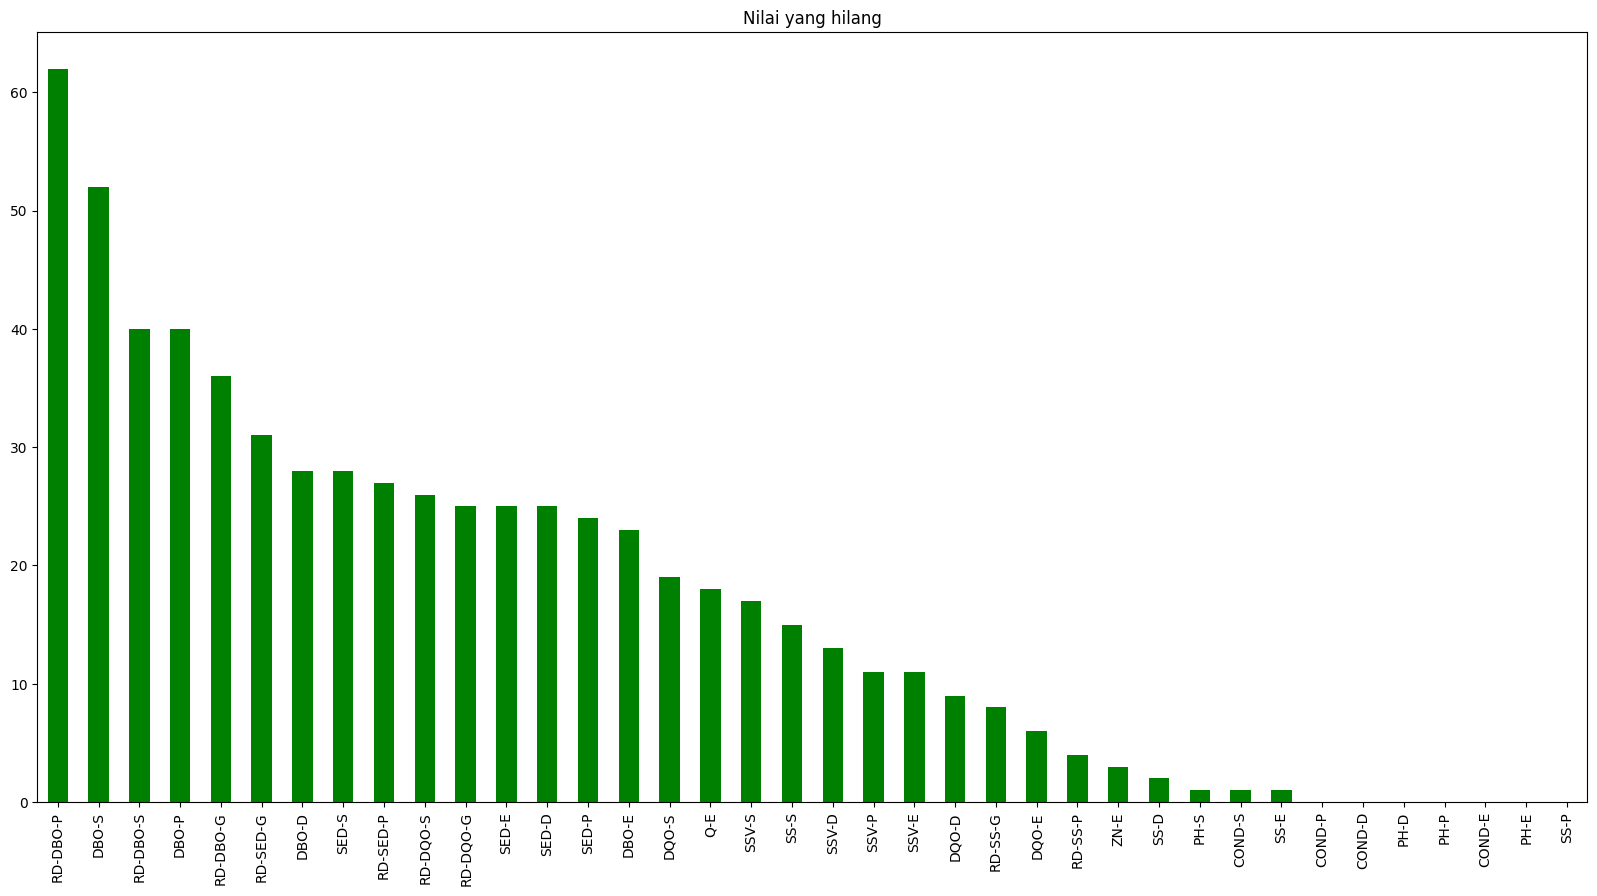

-----------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 527 entries, 1990-01-01 to 1991-10-30
Data columns (total 38 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Q-E       509 non-null    float64
 1   ZN-E      524 non-null    float64
 2   PH-E      527 non-null    float64
 3   DBO-E     504 non-null    float64
 4   DQO-E     521 non-null    float64
 5   SS-E      526 non-null    float64
 6   SSV-E     516 non-null    float64
 7   SED-E     502 non-null    float64
 8   COND-E    527 non-null    int64  
 9   PH-P      527 non-null    float64
 10  DBO-P     487 non-null    float64
 11  SS-P      527 non-null    int64  
 12  SSV-P     516 non-null    float64
 13  SED-P     503 non-null    float64
 14  COND-P    527 non-null    int64  
 15  PH-D      527 non-null    float64
 16  DBO-D     499 non-null    float64
 17  DQO-D     518 non-null    float64
 18  SS-D      525 non-null    float

In [36]:
data.isna().sum().sort_values(ascending=False).plot(kind='bar', color='green', figsize=(20,10))
plt.title("Nilai yang hilang")
plt.show()
print("-----------------------------------------------------------")
data.info()

In [37]:
for i in range(1, 6):
  data.ffill(inplace=True)
  data.bfill(inplace=True)
data

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
Date,,,,,,,,,,,,,,,,,,,,,
1990-01-01,41230.0,0.35,7.6,120.0,344.0,136.0,54.4,4.5,993,7.5,...,903.0,32.6,62.8,93.3,85.9,62.5,86.7,71.8,87.5,99.4
1990-01-02,37386.0,1.40,7.9,165.0,470.0,170.0,76.5,4.0,1365,7.9,...,1481.0,32.6,50.0,94.4,85.9,73.6,86.7,79.4,89.4,100.0
1990-01-03,34535.0,1.00,7.8,232.0,518.0,220.0,65.5,5.5,1617,7.9,...,1492.0,32.6,62.4,95.0,81.3,59.9,87.5,71.8,85.9,99.8
1990-01-04,32527.0,3.00,7.8,187.0,460.0,180.0,67.8,5.2,1832,7.9,...,1590.0,13.2,57.6,95.5,85.3,70.4,85.0,77.2,83.3,100.0
1990-01-07,27760.0,1.20,7.6,199.0,466.0,186.0,74.2,4.5,1220,7.5,...,1411.0,38.2,46.6,95.0,84.9,61.1,89.4,73.8,86.6,99.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991-10-25,35400.0,0.70,7.6,156.0,364.0,194.0,63.9,5.5,1680,7.6,...,1840.0,47.3,61.3,94.0,76.4,58.0,86.5,82.4,90.7,99.8
1991-10-26,30964.0,3.30,7.7,220.0,540.0,184.0,62.0,3.5,1445,7.7,...,1337.0,47.3,38.6,93.3,76.4,87.0,92.7,95.0,91.8,95.7
1991-10-27,35573.0,7.30,7.6,176.0,333.0,178.0,64.0,3.5,1627,7.7,...,1799.0,47.3,40.4,95.0,76.4,72.9,90.9,79.9,91.8,98.6


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 527 entries, 1990-01-01 to 1991-10-30
Data columns (total 38 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Q-E       527 non-null    float64
 1   ZN-E      527 non-null    float64
 2   PH-E      527 non-null    float64
 3   DBO-E     527 non-null    float64
 4   DQO-E     527 non-null    float64
 5   SS-E      527 non-null    float64
 6   SSV-E     527 non-null    float64
 7   SED-E     527 non-null    float64
 8   COND-E    527 non-null    int64  
 9   PH-P      527 non-null    float64
 10  DBO-P     527 non-null    float64
 11  SS-P      527 non-null    int64  
 12  SSV-P     527 non-null    float64
 13  SED-P     527 non-null    float64
 14  COND-P    527 non-null    int64  
 15  PH-D      527 non-null    float64
 16  DBO-D     527 non-null    float64
 17  DQO-D     527 non-null    float64
 18  SS-D      527 non-null    float64
 19  SSV-D     527 non-null    float64
 20  SED-D     527

In [39]:
#Normalization
mean = data.mean()
std = data.std()

In [40]:
data = (data - mean)/std
data.head(5)

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
Date,,,,,,,,,,,,,,,,,,,,,
1990-01-01,0.623598,-0.729570,-0.853283,-1.099208,-0.523223,-0.672617,-0.578152,-0.025688,-1.229736,-1.454143,...,-1.526281,-0.432796,0.337649,0.313378,0.296026,-0.410102,-0.287504,-0.670416,-0.176696,0.069780
1990-01-02,0.035119,-0.346909,0.365362,-0.388432,0.528545,-0.422296,1.216078,-0.210630,-0.287721,0.308556,...,-0.034986,-0.432796,-0.665233,0.437137,0.296026,0.501085,-0.287504,0.169560,0.055064,0.207169
1990-01-03,-0.401341,-0.492685,-0.040853,0.669835,0.929218,-0.054177,0.323022,0.344195,0.350418,0.308556,...,-0.006604,-0.432796,0.306309,0.504642,-0.175352,-0.623533,-0.181150,-0.670416,-0.371862,0.161373
1990-01-04,-0.708746,0.236194,-0.040853,-0.040941,0.445071,-0.348672,0.509752,0.233230,0.894863,0.308556,...,0.246245,-1.756877,-0.069772,0.560896,0.234542,0.238401,-0.513506,-0.073591,-0.689006,0.207169
1990-01-07,-1.438528,-0.419797,-0.853283,0.148599,0.495155,-0.304498,1.029348,-0.025688,-0.654905,-1.454143,...,-0.215592,-0.050586,-0.931624,0.504642,0.193553,-0.525027,0.071441,-0.449370,-0.286476,0.115577


In [41]:
df = pd.DataFrame(data)

corr_matrix = df.corr()
corr_matrix

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
Q-E,1.000000,0.036101,0.147464,-0.183635,-0.332340,-0.008384,-0.319980,-0.118319,-0.083469,0.163443,...,-0.072146,-0.086279,-0.024233,-0.052217,-0.041575,-0.040185,-0.074382,-0.160059,-0.018963,0.000374
ZN-E,0.036101,1.000000,-0.011092,0.005716,0.085096,0.091344,-0.098029,0.079847,0.052673,0.000461,...,0.069663,-0.066868,0.049984,0.016272,0.074306,0.042425,0.037761,0.058550,0.114517,0.031721
PH-E,0.147464,-0.011092,1.000000,0.224903,0.177341,-0.045714,0.184501,0.050052,0.272851,0.902909,...,0.233733,-0.039056,-0.153877,-0.150312,0.192597,0.219101,0.123425,0.141663,0.065359,0.020646
DBO-E,-0.183635,0.005716,0.224903,1.000000,0.493315,0.119519,0.230595,0.244184,0.203074,0.216045,...,0.197187,0.151443,-0.018956,-0.068779,0.173286,0.080904,0.283293,0.152571,0.018739,-0.034901
DQO-E,-0.332340,0.085096,0.177341,0.493315,1.000000,0.286192,0.249087,0.430992,0.308135,0.171856,...,0.275889,0.077419,0.125268,0.052885,0.103501,0.087526,0.096617,0.322210,0.111613,0.002688
SS-E,-0.008384,0.091344,-0.045714,0.119519,0.286192,1.000000,-0.542931,0.576708,0.083472,-0.100075,...,0.078518,0.179400,0.479287,0.140806,0.001950,-0.049955,0.059500,0.151772,0.258498,-0.002612
SSV-E,-0.319980,-0.098029,0.184501,0.230595,0.249087,-0.542931,1.000000,-0.140909,0.170660,0.219147,...,0.163223,-0.151194,-0.393917,-0.074077,0.132080,0.172460,0.048171,0.082931,-0.187719,0.025222
SED-E,-0.118319,0.079847,0.050052,0.244184,0.430992,0.576708,-0.140909,1.000000,0.191531,0.045189,...,0.160720,0.073082,0.318359,0.145227,0.077493,0.099712,0.083260,0.230171,0.198893,0.053105
COND-E,-0.083469,0.052673,0.272851,0.203074,0.308135,0.083472,0.170660,0.191531,1.000000,0.244974,...,0.901653,-0.056406,0.058835,0.019822,0.130875,0.101588,0.089655,0.067918,0.033439,0.052064
PH-P,0.163443,0.000461,0.902909,0.216045,0.171856,-0.100075,0.219147,0.045189,0.244974,1.000000,...,0.207641,-0.049267,-0.193449,-0.174160,0.154972,0.215552,0.093491,0.117419,0.032735,0.016392


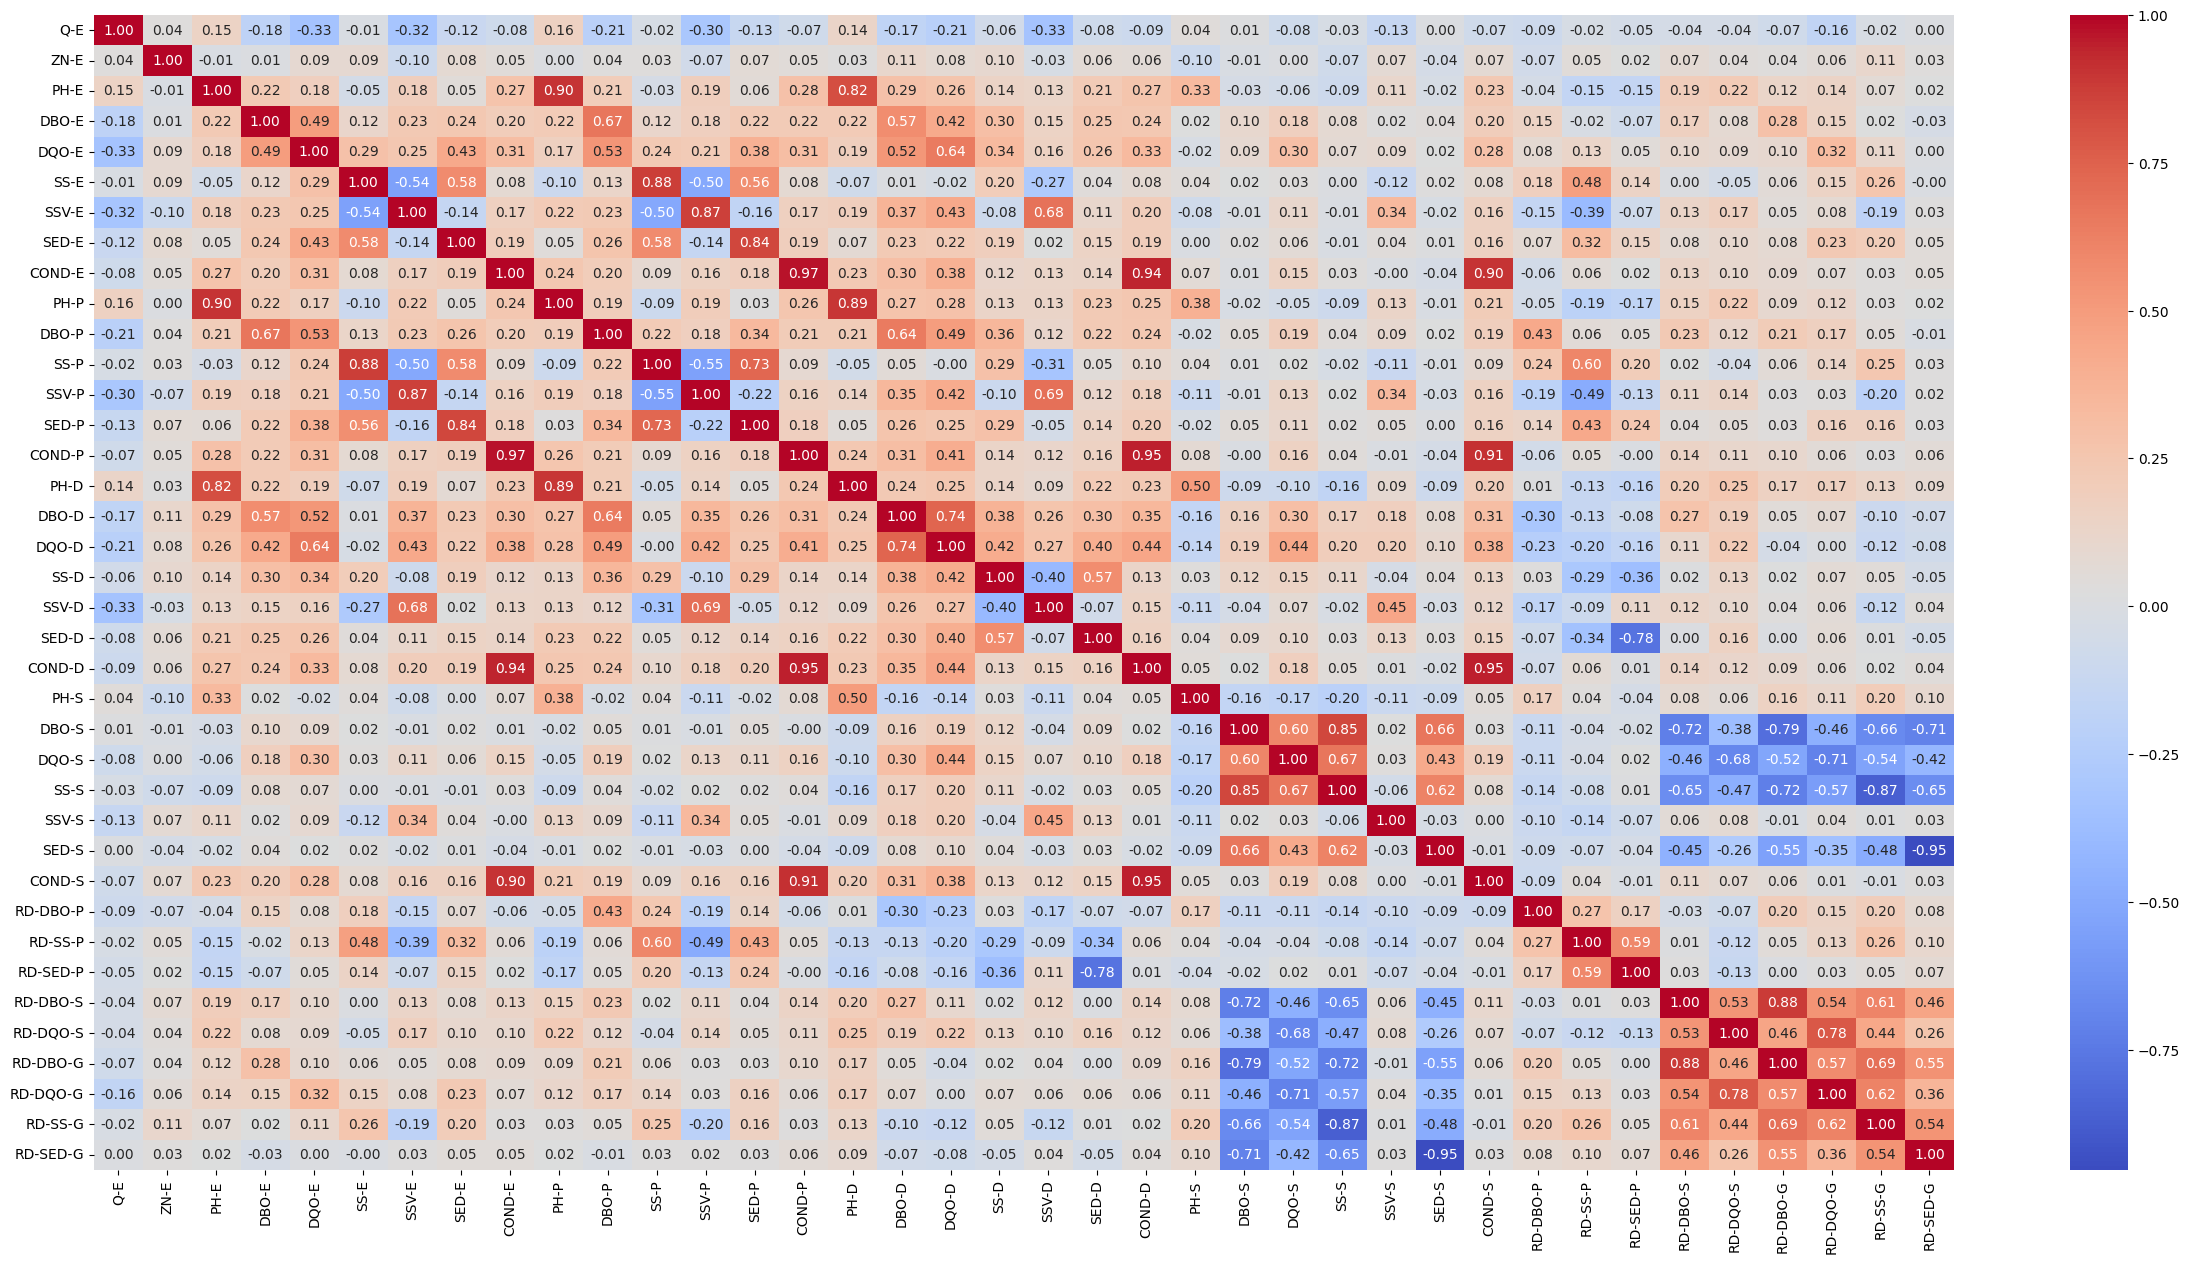

In [42]:
corr_matrix = df.corr()
plt.figure(figsize=(30, 15))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')
plt.show()

#4. Algorithm(K-Means)

In [43]:
x = data['DQO-E']
y = data['COND-E']

In [44]:
#Convert x and y into numpy array
X = np.array(list(zip(x, y)))

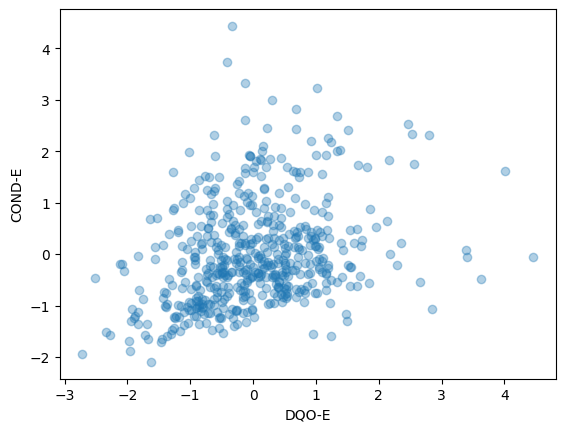

In [45]:
plt.scatter(x, y, alpha=0.35)
plt.xlabel('DQO-E')
plt.ylabel('COND-E')
plt.show()

In [46]:
def kmeans(X, k, max_iters=100):
    centroids = X[np.random.choice(range(len(X)), k, replace=False)]

    for _ in range(max_iters):
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    return labels, centroids

In [47]:
#Calculates the within-cluster sum of squares
def calculate_wcss(X, labels, centroids):
    wcss = 0
    for i, centroid in enumerate(centroids):
        cluster_points = X[labels == i]
        distance = np.sum((cluster_points - centroid)**2)
        wcss += distance
    return wcss

In [48]:
wcss_values = []
k_values = range(1, 11)
for k in k_values:
    labels, centroids = kmeans(X, k)
    wcss = calculate_wcss(X, labels, centroids)
    wcss_values.append(wcss)

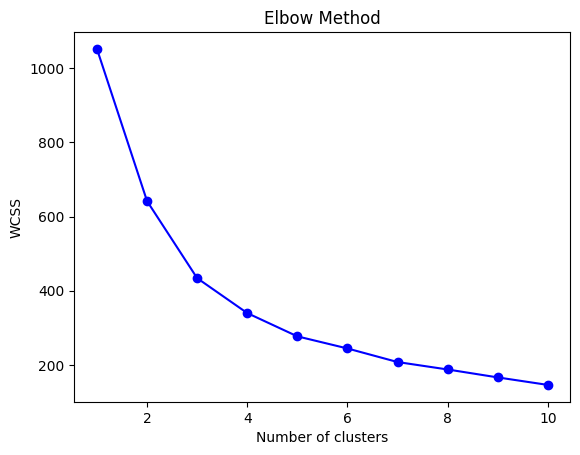

In [49]:
plt.plot(k_values, wcss_values, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [50]:
#Calculates the Silhouette Coefficient for a given clustering result
def calculate_silhouette(X, labels):
    n = len(X)
    silhouette_values = np.zeros(n)

    for i in range(n):
        a = np.mean(np.sqrt(np.sum((X - X[i])**2, axis=1))[labels == labels[i]])

        b_values = []
        for j in range(k):
            if j != labels[i]:
                b = np.mean(np.sqrt(np.sum((X - X[i])**2, axis=1))[labels == j])
                b_values.append(b)

        b = np.min(b_values) if len(b_values) > 0 else np.inf

        silhouette_value = (b - a) / max(a, b)
        silhouette_values[i] = silhouette_value

    return np.mean(silhouette_values)

silhouette_values = []
k_values = range(2, 11)
for k in k_values:
    labels, centroids = kmeans(X, k)
    silhouette = calculate_silhouette(X, labels)
    silhouette_values.append(silhouette)


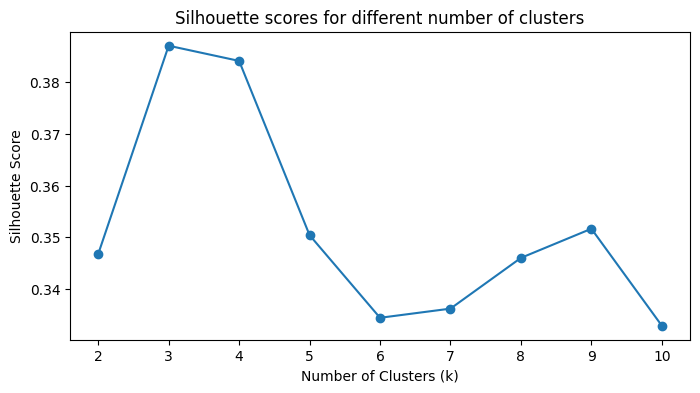

In [51]:
plt.figure(figsize=(8, 4))
plt.plot(k_values, silhouette_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette scores for different number of clusters')
plt.xticks(k_values)
plt.show()

In [52]:
for i, k in enumerate(k_values):
    labels, centroids = kmeans(X, k)
    silhouette = calculate_silhouette(X, labels)
    print("Silhouette score for cluster =", k, "is", "{:.5f}".format(silhouette))

Silhouette score for cluster = 2 is 0.34679
Silhouette score for cluster = 3 is 0.38657
Silhouette score for cluster = 4 is 0.36955
Silhouette score for cluster = 5 is 0.36856
Silhouette score for cluster = 6 is 0.32595
Silhouette score for cluster = 7 is 0.33605
Silhouette score for cluster = 8 is 0.33328
Silhouette score for cluster = 9 is 0.34167
Silhouette score for cluster = 10 is 0.35039


#5. Result

In [53]:
data = [(row['DQO-E'], row['COND-E']) for _, row in data.iterrows()]

In [54]:
def plot_scatterplot(data, labels, centroids):
    colors = ['r', 'g', 'b', 'c', 'm']
    for i, point in enumerate(data):
        plt.scatter(point[0], point[1], color=colors[labels[i]], alpha=0.6)

    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='o', color='yellow', s=100)

    plt.xlabel('DQO-E')
    plt.ylabel('COND-E')
    plt.title('K-Means Clustering')
    plt.show()

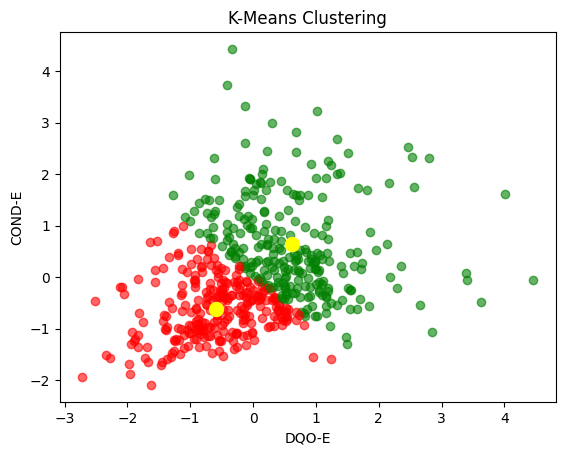

In [55]:
k = 2
labels, centroids = kmeans(X, k)

plot_scatterplot(data, labels, centroids)

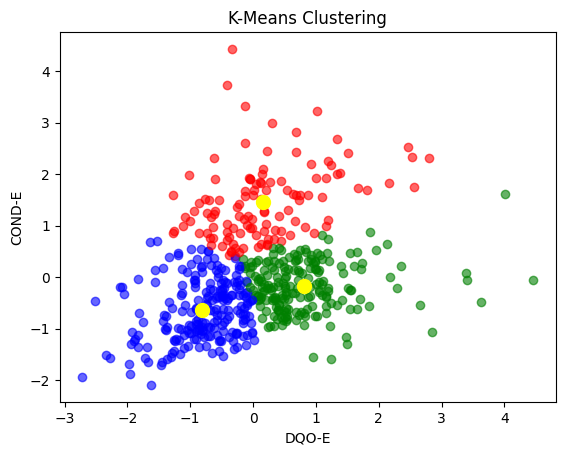

In [56]:
k = 3
labels, centroids = kmeans(X, k)

plot_scatterplot(data, labels, centroids)

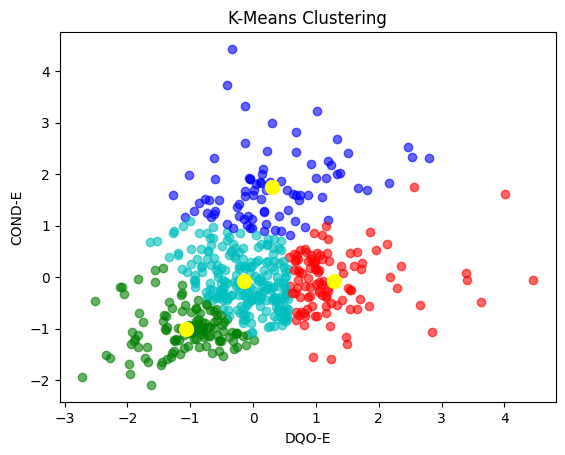

In [57]:
k = 4
labels, centroids = kmeans(X, k)

plot_scatterplot(data, labels, centroids)

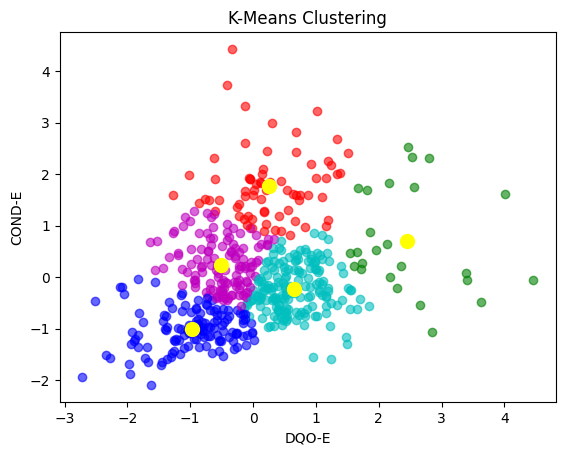

In [58]:
k = 5
labels, centroids = kmeans(X, k)

plot_scatterplot(data, labels, centroids)